In [50]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df['fare_class'].value_counts()

fare_class
0    80000
1    40000
Name: count, dtype: int64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371 # average radius of Earch in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2] - df[lat1])
    delta_lambda = np.radians(df[long2] - df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)  # in kilometers

    return d

In [7]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [8]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01


In [20]:
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')
df['Weekday'] = df['EDTdate'].dt.strftime('%a')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [21]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [22]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

## Separate categorical from continuous columns

In [23]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [24]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']  # this column is the label

In [25]:
# convert three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [26]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [27]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [28]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [29]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [30]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [32]:
df['Weekday'].head().cat.codes.values

array([1, 2, 2, 3, 0], dtype=int8)

### Combine the three categorical columns into one input array using numpy.stack and no need for Series index, just the values.

In [33]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [34]:
len(cats)

120000

In [35]:
# Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64)

cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [36]:
# Convert continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)

In [37]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [38]:
conts.type()

'torch.FloatTensor'

In [39]:
cats.type()

'torch.LongTensor'

In [40]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values).flatten()

y

tensor([0, 0, 1,  ..., 1, 0, 0])

In [41]:
y.type()

'torch.LongTensor'

In [42]:
cats.shape

torch.Size([120000, 3])

In [43]:
conts.shape

torch.Size([120000, 6])

In [44]:
y.shape

torch.Size([120000])

### Setting embedding size

In [45]:
# Here set embedding sizes for Hours, AMorPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

# Define a TubularModel

#### for test only

In [46]:
catz = cats[:2]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [47]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [51]:
# This will be assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [53]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [54]:
# the following will happen inside the forward() method
embeddingz = []
for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:, i]))
embeddingz

[tensor([[-1.2227, -1.2123,  0.7909,  0.4866, -0.3068, -1.1997, -1.1877, -0.6918,
           0.3362,  0.2923, -0.0721,  1.8666],
         [-0.3661,  1.7056,  1.2857, -0.4095, -1.1650, -0.6213,  1.0164,  1.2473,
          -0.1782, -0.3517,  0.4064,  0.6875]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.0209],
         [-1.0209]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.3013, -0.8143, -0.1054, -1.7737],
         [-0.6986,  1.3104,  0.2947, -1.2066]], grad_fn=<EmbeddingBackward0>)]

In [55]:
# concatenate the embedding sections(12, 1, 4) into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[-1.2227, -1.2123,  0.7909,  0.4866, -0.3068, -1.1997, -1.1877, -0.6918,
          0.3362,  0.2923, -0.0721,  1.8666, -1.0209,  1.3013, -0.8143, -0.1054,
         -1.7737],
        [-0.3661,  1.7056,  1.2857, -0.4095, -1.1650, -0.6213,  1.0164,  1.2473,
         -0.1782, -0.3517,  0.4064,  0.6875, -1.0209, -0.6986,  1.3104,  0.2947,
         -1.2066]], grad_fn=<CatBackward0>)

In [56]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(0.4)

In [57]:
z = selfembdrop(z)
z

tensor([[-2.0378, -0.0000,  1.3181,  0.8110, -0.5113, -0.0000, -1.9795, -1.1531,
          0.5603,  0.4871, -0.1201,  0.0000, -0.0000,  2.1689, -0.0000, -0.1756,
         -2.9561],
        [-0.6102,  2.8426,  2.1428, -0.6824, -0.0000, -1.0355,  0.0000,  0.0000,
         -0.2971, -0.5862,  0.0000,  1.1458, -0.0000, -0.0000,  0.0000,  0.4911,
         -0.0000]], grad_fn=<MulBackward0>)

In [58]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni, nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x= self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [59]:
model = TabularModel(emb_szs, conts.shape[1], 2, [200, 100], p=0.4) # out_sz = 2

In [60]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

#### Define loss function & optimizer

##### for classification, torch.nn.CrossEntropyLoss() will be used instead of MSE loss
##### for the optimizer, torch.optim.Adam() will still be used.

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Perform train/test splits

In [66]:
batch_size = 30000
test_size = int(batch_size * 0.2)

In [68]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [69]:
len(cat_train)

24000

In [70]:
len(cat_test)

6000

In [71]:
len(y_train)

24000

## Train the model

In [72]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i += 1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {loss.item():10.8f}')
print(f'\nDuration: {(time.time() - start_time)/60:.2f} mins')

epoch:   1 loss: 0.78605902
epoch:  26 loss: 0.36605325
epoch:  51 loss: 0.32729027
epoch:  76 loss: 0.31123778
epoch: 101 loss: 0.30463907
epoch: 126 loss: 0.29203430
epoch: 151 loss: 0.28483078
epoch: 176 loss: 0.27868670
epoch: 201 loss: 0.27516583
epoch: 226 loss: 0.26914424
epoch: 251 loss: 0.26084283
epoch: 276 loss: 0.25746724
epoch: 300 loss: 0.25765237

Duration: 11.53 mins


### Plot the loss function

Text(0, 0.5, 'Cross Entropy Loss')

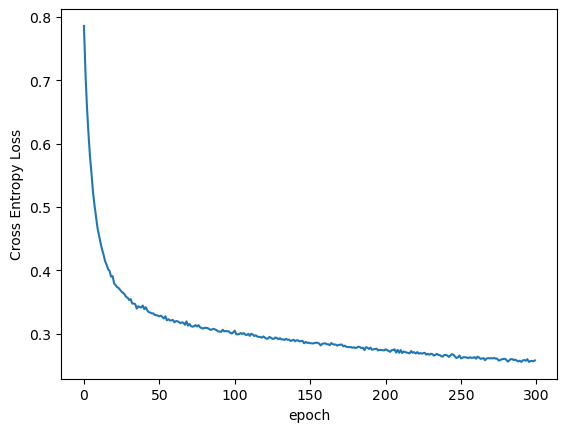

In [74]:
# Convert list of tensors to a list of NumPy arrays
losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in losses]
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('Cross Entropy Loss')

### Validate the model

In [75]:
# To eveluate the entire test set
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.25319332


In [81]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX Y_TEST
tensor([ 1.9714, -1.8144])    0      0   
tensor([-0.1564,  0.4201])    1      0   
tensor([ 2.8550, -0.6364])    0      0   
tensor([-1.4706,  2.1532])    1      1   
tensor([ 1.0360, -0.6097])    0      0   
tensor([-4.8304,  3.5820])    1      1   
tensor([ 2.7776, -1.1337])    0      0   
tensor([ 1.0637, -1.0252])    0      0   
tensor([ 2.0894, -2.0238])    0      0   
tensor([ 1.9385, -1.1076])    0      0   
tensor([0.7295, 0.0612])      0      0   
tensor([ 2.3338, -1.8805])    0      0   
tensor([ 2.1682, -1.5566])    0      0   
tensor([-0.6049,  1.3015])    1      1   
tensor([ 1.7047, -1.0560])    0      0   
tensor([ 1.7127, -1.3125])    0      0   
tensor([-1.0842,  1.1873])    1      1   
tensor([ 2.1350, -1.1831])    0      0   
tensor([ 2.5759, -1.1695])    0      0   
tensor([-0.2405,  0.5741])    1      1   
tensor([ 1.4462, -2.2757])    0      0   
tensor([ 1.8500, -0.2874])    0      0   
tensor([ 3.0105, -1.8139])    0    

## Save the model

In [78]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareClassModel_version1.pt')
else:
    print('Model has not been trained.')